In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import re
from itertools import compress

# Debate Portals

In [2]:
# Conclusions

# $ jq "" idebate.json | grep "\"conclusion\"\:" | sort | uniq | wc -l
# 5106

# $ jq "" debatewise.json | grep "\"conclusion\"\:" | sort | uniq | wc -l
# 5992

# $ jq "" debateorg.json | grep "\"conclusion\"\:" | sort | uniq | wc -l
# 50821

# $ jq "" debatepedia.json | grep "\"conclusion\"\:" | sort | uniq | wc -l
# 10314

In [3]:
# Premises

# $ jq "" idebate.json | grep "\"premises\"\:" | wc -l
# 13522

# $ jq "" debatewise.json | grep "\"premises\"\:" | wc -l
# 14353

# $ jq "" debateorg.json | grep "\"premises\"\:" | wc -l
# 338620

# $ jq "" debatepedia.json | grep "\"premises\"\:" | wc -l
# 21197

In [4]:
data = {"Data" : ["debateorg", "debateorg","debateorg",\
                  "idebate","idebate","idebate",\
                  "debatepedia", "debatepedia", "debatepedia",\
                  "debatewise", "debatewise", "debatewise",\
                 "Combined", "Combined", "Combined"],
        "Type" : ["Conclusion", "Premise", "Total", "Conclusion", "Premise", "Total",\
                 "Conclusion", "Premise", "Total","Conclusion", "Premise", "Total",\
                 "Conclusion", "Premise", "Total"],
        "Count": [50821, 338620, 50821 + 338620,\
                  5106, 13522, 5106 + 13522,\
                  10314, 21197, 10314 + 21197,\
                  5992, 14353, 5992 + 14353,\
                 50821 + 5106 + 10314 + 5992,\
                 338620 + 13522 + 21197 + 14353,\
                 50821 + 338620 + 5106 + 13522 + 10314 + 21197 + 5992 + 14353]}
dataF = pd.DataFrame(data)
#dataF["Total"] = dataF["Conclusions"] + dataF["Premises"]
#total = {"Data" : "Combined", "Total" : dataF["Total"].sum(),\
#         "Premises" : dataF["Premises"].sum(), "Conclusions" : dataF["Conclusions"].sum()}
#dataF = dataF.append(total, ignore_index = True)
dataF

Count         Data        Type
0    50821    debateorg  Conclusion
1   338620    debateorg     Premise
2   389441    debateorg       Total
3     5106      idebate  Conclusion
4    13522      idebate     Premise
5    18628      idebate       Total
6    10314  debatepedia  Conclusion
7    21197  debatepedia     Premise
8    31511  debatepedia       Total
9     5992   debatewise  Conclusion
10   14353   debatewise     Premise
11   20345   debatewise       Total
12   72233     Combined  Conclusion
13  387692     Combined     Premise
14  459925     Combined       Total

/usr/lib/python3/dist-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


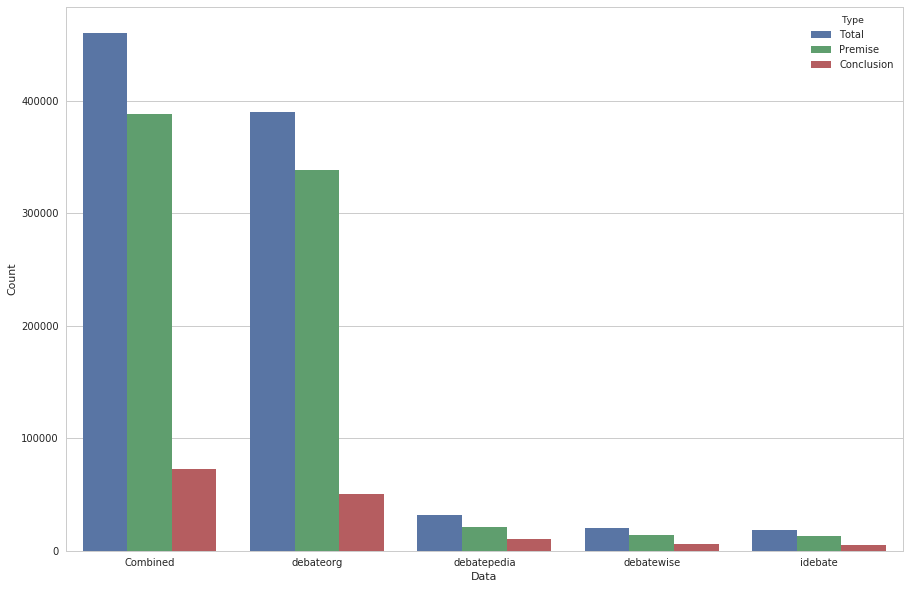

In [5]:
fig = plt.figure(figsize = (15,10))
sns.set(style="whitegrid")
sns.barplot(data = dataF, x = "Data", y = "Count", hue = "Type",\
            order = ["Combined","debateorg", "debatepedia", "debatewise", "idebate"],\
            hue_order = ["Total", "Premise", "Conclusion"])

In [6]:
dataF.loc[dataF["Data"] == "Combined"]

Count      Data        Type
12   72233  Combined  Conclusion
13  387692  Combined     Premise
14  459925  Combined       Total

In [7]:
print("Conclusion: " + str(72233.0 / 459925.0) + " %")
print("Premise: " + str(387692.0 / 459925.0) + " %")

Conclusion: 0.15705386747839323 %
Premise: 0.8429461325216068 %


In [8]:
459925.0 * 0.8

367940.0

# Debatepedia

In [9]:
df0 = pd.read_csv("/home/weci2587/projects/wstud-visit-the-dome-ss19/data/debatepedia/labeled_frames_args_merged_reindexed.csv", sep = "|")
print(len(df0))

12326


In [10]:
df0

argument_ids  frame_ids                    frame_label  topic_ids  \
0                 0          0                      economics          0   
1                 1          0                      economics          0   
2                 2          0                      economics          0   
3                 3          0                      economics          0   
4                 4          0                      economics          0   
5                 5          0                      economics          0   
6                 6          0                      economics          0   
7                 7          0                      economics          0   
8                 8          0                      economics          0   
9                 9          0                      economics          0   
10               10          0                      economics          0   
11               11          1                      immediacy          0   
12               12          1                      immediacy          0   
13               13          1                      immediacy          0   
14               14          1                      immediacy          0   
15               15          2                   intervention          0   
16               16          2                   intervention          0   
17               17          2                   intervention          0   
18               18          2                   intervention          0   
19               19          2                   intervention          0   
20               20          2                   intervention          0   
21               21          3                   moral hazard          0   
22               22          3                   moral hazard          0   
23               23          4                     wallstreet          0   
24               24          4                     wallstreet          0   
25               25          4                     wallstreet          0   
26               26          4                     wallstreet          0   
27               27          4                     wallstreet          0   
28               28          4                     wallstreet          0   
29               29          5                      taxpayers          0   
...             ...        ...                            ...        ...   
12296         14085       1517                 nuclear energy       1820   
12297         14086       1517                 nuclear energy       1820   
12298         14087         46                         safety       1820   
12299         14088         46                         safety       1820   
12300         14089         46                         safety       1820   
12301         14090         46                         safety       1820   
12302         14091       1614         fossil fuel dependence       1820   
12303         14092         38                     deterrence       1822   
12304         14093         38                     deterrence       1822   
12305         14094       1615      fighting drug trafficking       1822   
12306         14095       1615      fighting drug trafficking       1822   
12307         14096       1616  sentencing and rehabilitation       1822   
12308         14097       1616  sentencing and rehabilitation       1822   
12309         14098       1617            policing procedures       1822   
12310         14099       1617            policing procedures       1822   
12311         14100       1618              urban development       1822   
12312         14101       1618              urban development       1822   
12313         14102       1619            costs and economics       1822   
12314         14103       1619            costs and economics       1822   
12315         14104       1620                 bad zookeepers       1823   
12316         14105       1620                 bad zook

## Remove duplicate conclusions

In [11]:
duplicateConclusions = []
index_i = 0
for conclusion in df0["conclusion"]:
    index_j = 0
    check = False
    for duplicateConclusion in df0["conclusion"]:
        if conclusion == duplicateConclusion and index_i != index_j and  not index_j < index_i:
            if not check:
                print("Duplicate at " + str(index_i) + "  ---  " + conclusion)
                check = True
            print("Duplicate at " + str(index_j) + "  ---  " + duplicateConclusion)
            duplicateConclusions.append(index_j)
        index_j += 1
    if check:
        print("")
    index_i += 1

Duplicate at 194  ---  Nuclear weapons make the world less secure
Duplicate at 483  ---  Nuclear weapons make the world less secure

Duplicate at 196  ---  Nuclear submarine accidents are a global hazard
Duplicate at 484  ---  Nuclear submarine accidents are a global hazard

Duplicate at 202  ---  US nuclear weapons reduce the intensity of international conflicts
Duplicate at 486  ---  US nuclear weapons reduce the intensity of international conflicts

Duplicate at 223  ---  Abortion may be immoral, but it is still a woman's right
Duplicate at 225  ---  Abortion may be immoral, but it is still a woman's right

Duplicate at 250  ---  No one argues that an acorn or even an animal fetus has a “sanctity” or rights.
Duplicate at 267  ---  No one argues that an acorn or even an animal fetus has a “sanctity” or rights.

Duplicate at 404  ---  Non-circumcision can result in many complications
Duplicate at 6474  ---  Non-circumcision can result in many complications

Duplicate at 405  ---  The 

Duplicate at 670  ---  It is perfectly natural to use animals for our own nutrition and pleasure.
Duplicate at 6158  ---  It is perfectly natural to use animals for our own nutrition and pleasure.

Duplicate at 672  ---  Animals cannot possess rights because they have no moral judgement
Duplicate at 6192  ---  Animals cannot possess rights because they have no moral judgement
Duplicate at 11781  ---  Animals cannot possess rights because they have no moral judgement

Duplicate at 673  ---  Animals cannot make moral claims so cannot claim rights
Duplicate at 6193  ---  Animals cannot make moral claims so cannot claim rights
Duplicate at 11782  ---  Animals cannot make moral claims so cannot claim rights

Duplicate at 674  ---  That the retarded have rights does not justify animal rights
Duplicate at 6194  ---  That the retarded have rights does not justify animal rights
Duplicate at 11784  ---  That the retarded have rights does not justify animal rights

Duplicate at 675  ---  Animal r

Duplicate at 1675  ---  Allowing public nudity risks exposure to children
Duplicate at 8993  ---  Allowing public nudity risks exposure to children

Duplicate at 1676  ---  Public nudity is a valuable expression of freedom.
Duplicate at 8991  ---  Public nudity is a valuable expression of freedom.

Duplicate at 1677  ---  Banning public nudity is offensive to nudists.
Duplicate at 8992  ---  Banning public nudity is offensive to nudists.

Duplicate at 1690  ---  Public smoking ban protects health of non-smokers.
Duplicate at 10491  ---  Public smoking ban protects health of non-smokers.

Duplicate at 1691  ---  Public smoking ban protects rights of non-smokers.
Duplicate at 10492  ---  Public smoking ban protects rights of non-smokers.

Duplicate at 1692  ---  Smokers can/should smoke in private places, not in public.
Duplicate at 10493  ---  Smokers can/should smoke in private places, not in public.

Duplicate at 1734  ---  Trans fats extend shelf life of foods.
Duplicate at 1761  ---

Duplicate at 2575  ---  Civil unions are "separate, but not equal"
Duplicate at 5308  ---  Civil unions are "separate, but not equal"

Duplicate at 2627  ---  Obama has a strong record of legislative achievement
Duplicate at 7940  ---  Obama has a strong record of legislative achievement

Duplicate at 2631  ---  Obama would be a fresh, uncorrupted face in the White House
Duplicate at 7939  ---  Obama would be a fresh, uncorrupted face in the White House

Duplicate at 2632  ---  Obama's diverse global background is valuable.
Duplicate at 7938  ---  Obama's diverse global background is valuable.

Duplicate at 2637  ---  Obama inspires people to become better citizens.
Duplicate at 7963  ---  Obama inspires people to become better citizens.

Duplicate at 2711  ---  Pesticide use.
Duplicate at 2712  ---  Pesticide use.

Duplicate at 2819  ---  Liberal democracies should ensure a degree of "equality of outcome"
Duplicate at 7576  ---  Liberal democracies should ensure a degree of "equality 

Duplicate at 4133  ---  School vouchers erode national educational standards.
Duplicate at 4145  ---  School vouchers erode national educational standards.

Duplicate at 4177  ---  Political style will replace merit with election of judges
Duplicate at 4183  ---  Political style will replace merit with election of judges

Duplicate at 4215  ---  Electric car battery technology and costs are improving rapidly
Duplicate at 6356  ---  Electric car battery technology and costs are improving rapidly

Duplicate at 4274  ---  Ending the tourism ban would help undermine the Cuban regime
Duplicate at 4279  ---  Ending the tourism ban would help undermine the Cuban regime

Duplicate at 4425  ---  Torture "to save lives" has a substantial body of support among publics:
Duplicate at 11129  ---  Torture "to save lives" has a substantial body of support among publics:

Duplicate at 4426  ---  "Half of Americans think that torturing terrorist suspects can be "sometimes" or "often" justified."
Duplica

Duplicate at 6157  ---  Exploiting animals is more dignified than their living in the wild
Duplicate at 11768  ---  Exploiting animals is more dignified than their living in the wild

Duplicate at 6163  ---  Humans have a choice and thus responsibility to do no harm to animals.
Duplicate at 11774  ---  Humans have a choice and thus responsibility to do no harm to animals.

Duplicate at 6164  ---  Killing animals should be viewed as equivalent to killing humans
Duplicate at 11775  ---  Killing animals should be viewed as equivalent to killing humans

Duplicate at 6165  ---  Animals should be treated as we would want to be treated
Duplicate at 11776  ---  Animals should be treated as we would want to be treated

Duplicate at 6168  ---  Differences of opinion on killing and hunting must be tolerated
Duplicate at 6208  ---  Differences of opinion on killing and hunting must be tolerated

Duplicate at 6169  ---  Those that disapprove of hunting should not hunt.
Duplicate at 6209  ---  Those

Duplicate at 7206  ---  Kyoto Protocol employs inefficient government controls
Duplicate at 7210  ---  Kyoto Protocol employs inefficient government controls

Duplicate at 7229  ---  Deterrence prevents North Korea from invading South Korea (not mines)
Duplicate at 8308  ---  Deterrence prevents North Korea from invading South Korea (not mines)

Duplicate at 7231  ---  North Korea's tunnel network under DMZ undermines landmines.
Duplicate at 8310  ---  North Korea's tunnel network under DMZ undermines landmines.

Duplicate at 7235  ---  Landmines inhibit a counter-attack into North Korea
Duplicate at 8314  ---  Landmines inhibit a counter-attack into North Korea

Duplicate at 7238  ---  Defending against North Korean blitzkrieg requires landmines
Duplicate at 8317  ---  Defending against North Korean blitzkrieg requires landmines

Duplicate at 7240  ---  Landmines in Korea would force attackers into vulnerable territory.
Duplicate at 8319  ---  Landmines in Korea would force attackers 

Duplicate at 8239  ---  The Pentagon is preparing for war.
Duplicate at 8242  ---  The Pentagon is preparing for war.

Duplicate at 8296  ---  Geneva Conventions regulates use of landmines; ban is excessive.
Duplicate at 8330  ---  Geneva Conventions regulates use of landmines; ban is excessive.

Duplicate at 8493  ---  Multiculturalism highlights differences and can increase hate crimes.
Duplicate at 8502  ---  Multiculturalism highlights differences and can increase hate crimes.

Duplicate at 8540  ---  Economic liberalisation doesn't necessarily cause democratic progression
Duplicate at 8555  ---  Economic liberalisation doesn't necessarily cause democratic progression

Duplicate at 8589  ---  Private banks are better at allocating loans than government
Duplicate at 8592  ---  Private banks are better at allocating loans than government

Duplicate at 8645  ---  Emissions from natural gas can be filtered out
Duplicate at 8690  ---  Emissions from natural gas can be filtered out

Dupl

Duplicate at 9051  ---  Open primaries let independents/third-party-voters participate
Duplicate at 9058  ---  Open primaries let independents/third-party-voters participate

Duplicate at 9138  ---  Regional and local government and security apparatuses would be unable to maintain order following a partitioning of Iraq:
Duplicate at 9147  ---  Regional and local government and security apparatuses would be unable to maintain order following a partitioning of Iraq:

Duplicate at 9235  ---  Debate:Wind energy
Duplicate at 9240  ---  Debate:Wind energy

Duplicate at 9237  ---  Wind energy production is inconsistent relative to demand
Duplicate at 12090  ---  Wind energy production is inconsistent relative to demand

Duplicate at 9250  ---  Debate: Natural gas vehicles
Duplicate at 9256  ---  Debate: Natural gas vehicles

Duplicate at 9272  ---  Polygamous men cannot reciprocate equally the love they receive from their wives.
Duplicate at 9295  ---  Polygamous men cannot reciprocate equall


Duplicate at 11198  ---  Public opinion irrelevant to merits of civilian trial of terrorists.
Duplicate at 11247  ---  Public opinion irrelevant to merits of civilian trial of terrorists.

Duplicate at 11199  ---  Trying and imprisoning terrorists will be popular where it creates jobs.
Duplicate at 11248  ---  Trying and imprisoning terrorists will be popular where it creates jobs.

Duplicate at 11200  ---  Majority of Americans are opposed to civilian trial of terrorists.
Duplicate at 11249  ---  Majority of Americans are opposed to civilian trial of terrorists.

Duplicate at 11295  ---  Television is mostly directed to films and shows that have commercial purposes but little cultural value:
Duplicate at 11296  ---  Television is mostly directed to films and shows that have commercial purposes but little cultural value:

Duplicate at 11364  ---  The U.N. has been extremely ineffective in the past.
Duplicate at 11709  ---  The U.N. has been extremely ineffective in the past.

Duplicat

In [12]:
print(len(duplicateConclusions))

548


In [13]:
df1 = df0.drop(duplicateConclusions)

In [14]:
duplicateConclusions = []
index_i = 0
for conclusion in df1["conclusion"]:
    index_j = 0
    check = False
    for duplicateConclusion in df1["conclusion"]:
        if conclusion == duplicateConclusion and index_i != index_j and  not index_j < index_i:
            if not check:
                print("Duplicate at " + str(index_i) + "  ---  " + conclusion)
                check = True
            print("Duplicate at " + str(index_j) + "  ---  " + duplicateConclusion)
            duplicateConclusions.append(index_j)
        index_j += 1
    if check:
        print("")
    index_i += 1

In [15]:
df1.loc[df1["conclusion"] == "Human life is of greater intrinsic value than animal life"]

argument_ids  frame_ids  frame_label  topic_ids           topics  \
691           739        128  differences         56   Animal testing   

                                               premise stances  \
691  - "beings that lack a rational faculty also la...     Yes   

                                            conclusion  
691  Human life is of greater intrinsic value than ...

In [16]:
print(len(df1))

11830


## Remove Urls

In [17]:
i = 0
for conclusion in df1["conclusion"]:
    if re.search(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", conclusion):
        print(conclusion)
        print(i)
    i += 1

http://www.populationmedia.org/
2940


In [18]:
df1.loc[2970]

argument_ids                                                 3267
frame_ids                                                     498
frame_label                                      empowering women
topic_ids                                                     352
topics           Contraception for the purpose of reducing ove...
premise         Bill Ryerson, President of the Population Medi...
stances                                                        No
conclusion                        http://www.populationmedia.org/
Name: 2970, dtype: object

In [19]:
i = 0
url = 0
for premise in df1["premise"]:
    if re.search(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", premise):
        url += 1
        print(i)
        print(premise)
    i += 1
print(url)

0


In [20]:
df1 = df1.drop([2970])
len(df1)

11829

## Remove "[\\.*]"

In [21]:
for conclusion in df1["conclusion"]:
    i += 1
    if re.search(r"\[", conclusion):
        print(conclusion + "\n")

[[Argument: Circumcision helps prevent herpes Circumcision helps prevent herpes



In [22]:
df1.loc[df1["conclusion"] == "[[Argument: Circumcision helps prevent herpes Circumcision helps prevent herpes"]

argument_ids  frame_ids   frame_label  topic_ids  \
6484          7322         75  adult health        751   

                         topics  \
6484   Infant male circumcision   

                                                premise stances  \
6484  Edgar J. Schoen, MD, Clinical Professor of Ped...     Yes   

                                             conclusion  
6484  [[Argument: Circumcision helps prevent herpes ...

In [23]:
df1.loc[6484, "conclusion"]\
= "Circumcision helps prevent herpes Circumcision helps prevent herpes"

In [24]:
df1.loc[6484]

argument_ids                                                 7322
frame_ids                                                      75
frame_label                                          adult health
topic_ids                                                     751
topics                                   Infant male circumcision
premise         Edgar J. Schoen, MD, Clinical Professor of Ped...
stances                                                       Yes
conclusion      Circumcision helps prevent herpes Circumcision...
Name: 6484, dtype: object

In [25]:
count = 0
for premise in df1["premise"]:
    if re.search(r"\[[\.]*\]", premise):
        count += 1
        print(premise + "\n")

- "Begin with the most fundamental question: Does the U.S. economy desperately need a massive stimulus, or not? There are economists who doubt it's possible for the government to effectively stimulate an economy of such size and complexity. Those economists, however, are in the minority. [...] The most respected economic wise men and women of both parties believe a huge stimulus is needed quickly to keep a dire economic situation from sinking into catastrophe."

- "At [the] core [of the Recovery and Reinvestment Plan] is a very simple idea: to put Americans back to work doing the work America needs done. [...] The plan will save or create three to four million jobs over the next two years. But not just any jobs - jobs that meet the needs we've neglected for far too long and lay the groundwork for long-term economic growth: jobs fixing our schools; computerizing medical records to save costs and save lives; repairing our infrastructure; and investing in renewable energy to help us move 

In [26]:
print(count)

579


In [27]:
for premise in df1["premise"]:
    if re.search(r"\[[\.]*\]", premise):
        df1.loc[df1["premise"] == premise, "premise"] = re.sub(r"\[[\.]*\]", "", premise)

In [28]:
count = 0
for premise in df1["premise"]:
    if re.search(r"\[[\.]*\]", premise):
        count += 1
print(count)

0


## Remove "[[0-9]+]"

In [29]:
count = 0
for premise in df1["premise"]:
    if re.search(r"\[[0-9]+\]", premise):
        count += 1
        print(premise + "\n")

Laumann et al. reported that circumcised men in their survey displayed greater rates of experience of various sexual practices, including oral sex, anal sex, and masturbation.[29] For example, among whites the "estimated ratio of the odds of masturbating at least once a month for circumcised men was 1.76 that for uncircumcised men." Dr. Laumann provides two explanations for the difference in sexual practices. "One is that uncircumcised men, a minority in this country, may feel a stigma that inhibits them. Another is that circumcision reduces sensitivity in the penis, leading circumcised men to try a range of sexual activities."

Waldinger et al. recruited 500 men (98 circumcised and 261 not-circumcised) from five countries: the Netherlands, United Kingdom, Spain, Turkey, and the United States and studied their ejaculation times during sexual intercourse. They found that circumcised men took on average 6.7 minutes to ejaculate, compared with 6.0 minutes for uncircumcised men. This diffe

In [30]:
print(count)

47


In [31]:
for premise in df1["premise"]:
    if re.search(r"\[[0-9]+\]", premise):
        replacement = re.sub(r"\[[0-9]+\]", "", premise)
        df1.loc[df1["premise"] == premise, "premise"] = replacement

In [32]:
count = 0
for premise in df1["premise"]:
    if re.search(r"\[[0-9]+\]", premise):
        count += 1
        print(premise + "\n")

In [33]:
print(count)

0


## Remove "[[a-zA-z]+]"

In [34]:
count = 0
for premise in df1["premise"]:
    if re.search(r"\[[a-zA-Z\s]+\]", premise):
        count += 1
        print(premise + "\n")

- "At [the] core [of the Recovery and Reinvestment Plan] is a very simple idea: to put Americans back to work doing the work America needs done.  The plan will save or create three to four million jobs over the next two years. But not just any jobs - jobs that meet the needs we've neglected for far too long and lay the groundwork for long-term economic growth: jobs fixing our schools; computerizing medical records to save costs and save lives; repairing our infrastructure; and investing in renewable energy to help us move toward energy independence. The plan also calls for immediate tax relief for 95 percent of American workers."

- "we must first recognize that the key economic activity that causes growth is not consumer spending but production.  Economic growth means an increase in the amount of wealth that exists in a country--and all wealth must be produced.  The focus of today's stimulus packages on consumer spending is therefore completely backward. Consumption is a consequence o

In [35]:
print(count)

314


In [36]:
for premise in df1["premise"]:
    if re.search(r"\[[a-zA-Z\s]+\]", premise):
        replacement = re.sub(r"\[", "", premise)
        replacement = re.sub(r"\]", "", replacement)
        df1.loc[df1["premise"] == premise, "premise"] = replacement

In [37]:
count = 0
for premise in df1["premise"]:
    if re.search(r"\[[a-zA-Z\s]+\]", premise):
        count += 1
        print(premise + "\n")

In [38]:
print(count)

0


## Remove "[......]"

In [39]:
count = 0
for premise in df1["premise"]:
    if re.search(r"\[.*\]", premise):
        count += 1
        print(re.search(r"\[.*\]", premise).group(0))

[from 1929]
[U.S. banks]
[in 2006]
[read full quote in argument page.]
[Argument:] 'Reasonable suspicion' is a meaningless term that will permit police misconduct. [Counter-argument:]
[Myth:] State governments aren’t allowed to get involved in immigration, which is a federal matter. [Counter-argument:]
[which legalized physician-assisted suicide]
[studies?...]
[Vance Packard, "The Hidden Persuaders"]
[of Belgium's parliament]
[of the 1930s, 60s, and 70s]
[The Economist, "Coming up empty", March 27th 2010]
[The Economist, "Coming up empty", March 27th 2010]
[of a cap-and-trade system] comes with the "trade" part. Let's say you have two power plants, each emitting 100 tons of carbon per hour. The first can reduce its emissions by 20 tons at a cost of $5 per ton, and the second can reduce its emissions by only 10 tons, at a cost of $30 per ton. Clearly the efficient thing to do is to make the former reduction rather than the latter, with the owner of the second plant paying the owner of t

In [40]:
print(count)

183


In [41]:
for premise in df1["premise"]:
    if re.search(r"\[.*\]", premise):
        replacement = re.sub(r"\[.*\]", "", premise)
        df1.loc[df1["premise"] == premise, "premise"] = replacement

In [42]:
count = 0
for premise in df1["premise"]:
    if re.search(r"\[|\]", premise):
        count += 1
        print(premise + "\n")

: "And while most Americans who favor keeping marriage as it has customarily been would prefer no legal recognition of same-sex unions at either the federal or the state level, we believe that they can live with federal civil unions — provided that no religious groups are forced to accept them as marriages. Many of these people may come to see civil unions as a compassionate compromise. For example, a PBS poll last fall found that 58 percent of white evangelicals under age 30 favor some form of legal same-sex union." [This all suggests that civil unions will be met with greater respect from the general American population, instead of the kind of recrimination that can lead to hatred and descrimination.

: "3. A civil union has to be explained and does not get the same respect as a marriage"]: "Only the word married conveys the universally understood meaning applicable to the lifetime commitment many couples make. Marriage has a meaning unmatched by any other word. Regardless of whether

In [43]:
print(count)

17


In [44]:
for premise in df1["premise"]:
    if re.search(r"\[|\]", premise):
        replacement = re.sub(r"\[|\]", "", premise)
        df1.loc[df1["premise"] == premise, "premise"] = replacement

## Store intermediate results

In [45]:
df1.to_csv("/home/weci2587/projects/wstud-visit-the-dome-ss19/data/debatepedia/debatepedia-preprocessed-1.csv", sep = "|",index = False)

In [46]:
df2 = pd.read_csv("/home/weci2587/projects/wstud-visit-the-dome-ss19/data/debatepedia/debatepedia-preprocessed-1.csv", sep = "|")
print(len(df2))

11829


In [47]:
df2

argument_ids  frame_ids                    frame_label  topic_ids  \
0                 0          0                      economics          0   
1                 1          0                      economics          0   
2                 2          0                      economics          0   
3                 3          0                      economics          0   
4                 4          0                      economics          0   
5                 5          0                      economics          0   
6                 6          0                      economics          0   
7                 7          0                      economics          0   
8                 8          0                      economics          0   
9                 9          0                      economics          0   
10               10          0                      economics          0   
11               11          1                      immediacy          0   
12               12          1                      immediacy          0   
13               13          1                      immediacy          0   
14               14          1                      immediacy          0   
15               15          2                   intervention          0   
16               16          2                   intervention          0   
17               17          2                   intervention          0   
18               18          2                   intervention          0   
19               19          2                   intervention          0   
20               20          2                   intervention          0   
21               21          3                   moral hazard          0   
22               22          3                   moral hazard          0   
23               23          4                     wallstreet          0   
24               24          4                     wallstreet          0   
25               25          4                     wallstreet          0   
26               26          4                     wallstreet          0   
27               27          4                     wallstreet          0   
28               28          4                     wallstreet          0   
29               29          5                      taxpayers          0   
...             ...        ...                            ...        ...   
11799         14085       1517                 nuclear energy       1820   
11800         14086       1517                 nuclear energy       1820   
11801         14087         46                         safety       1820   
11802         14088         46                         safety       1820   
11803         14089         46                         safety       1820   
11804         14090         46                         safety       1820   
11805         14091       1614         fossil fuel dependence       1820   
11806         14092         38                     deterrence       1822   
11807         14093         38                     deterrence       1822   
11808         14094       1615      fighting drug trafficking       1822   
11809         14095       1615      fighting drug trafficking       1822   
11810         14096       1616  sentencing and rehabilitation       1822   
11811         14097       1616  sentencing and rehabilitation       1822   
11812         14098       1617            policing procedures       1822   
11813         14099       1617            policing procedures       1822   
11814         14100       1618              urban development       1822   
11815         14101       1618              urban development       1822   
11816         14102       1619            costs and economics       1822   
11817         14103       1619            costs and economics       1822   
11818         14104       1620                 bad zookeepers       1823   
11819         14105       1620                 bad zook

In [48]:
duplicateConclusions = []
index_i = 0
for conclusion in df2["conclusion"]:
    index_j = 0
    check = False
    for duplicateConclusion in df2["conclusion"]:
        if conclusion == duplicateConclusion and index_i != index_j and  not index_j < index_i:
            if not check:
                print("Duplicate at " + str(index_i) + "  ---  " + conclusion)
                check = True
            print("Duplicate at " + str(index_j) + "  ---  " + duplicateConclusion)
            duplicateConclusions.append(index_j)
        index_j += 1
    if check:
        print("")
    index_i += 1

In [49]:
df2 = df2.dropna()
print(len(df2))

11827


## Remove Questions

In [50]:
count = 0
for conclusion in df2["conclusion"]:
    if conclusion[-1] == "?" or conclusion[-2] == "?":
        count += 1
        print(conclusion + "\n")

How is $700b bailout affordable when social programs are not?

Why tax banks and not other bailed-out institutions?

What right does anyone have to deprive another of life on the grounds that they deem that life as not worth living?

Many animals do demonstrate an ability to respect the "rights" of humans?

If humans are animals, why defy our animalistic instincts?

People would never want their own pets tested; why other animals?

If Euthanasia is for 6-month terminal patients, why not let them live it out?

What is more important in Australia than creating a republic?

States have balanced budget amendments, why not US govt?

Why is sexual procreation more "dignified" than scientific procreation?

Will tourists be forbidden from wearing burqa?

Would this ban apply to everyone, or just to candidates?

Why limit speech of corps/unions but not others?

If media can endorse, why can't other comps?

Shareholders aren't concern with media, why w/ other corps?

If gays get civil unions, wh

In [51]:
print(count)

71


In [52]:
for conclusion in df2["conclusion"]:
    if conclusion[-1] == "?" or conclusion[-2] == "?":
        df2 = df2[df2["conclusion"] != conclusion]

In [53]:
len(df2)

11756

In [54]:
df2.to_csv("/home/weci2587/projects/wstud-visit-the-dome-ss19/data/debatepedia/debatepedia-preprocessed-2.csv", sep = "|",index = False)

In [55]:
df3 = pd.read_csv("/home/weci2587/projects/wstud-visit-the-dome-ss19/data/debatepedia/debatepedia-preprocessed-2.csv", sep = "|")
print(len(df3))

11756


In [56]:
df3

argument_ids  frame_ids                    frame_label  topic_ids  \
0                 0          0                      economics          0   
1                 1          0                      economics          0   
2                 2          0                      economics          0   
3                 3          0                      economics          0   
4                 4          0                      economics          0   
5                 5          0                      economics          0   
6                 6          0                      economics          0   
7                 7          0                      economics          0   
8                 8          0                      economics          0   
9                 9          0                      economics          0   
10               10          0                      economics          0   
11               11          1                      immediacy          0   
12               12          1                      immediacy          0   
13               13          1                      immediacy          0   
14               14          1                      immediacy          0   
15               15          2                   intervention          0   
16               16          2                   intervention          0   
17               17          2                   intervention          0   
18               18          2                   intervention          0   
19               19          2                   intervention          0   
20               20          2                   intervention          0   
21               21          3                   moral hazard          0   
22               22          3                   moral hazard          0   
23               23          4                     wallstreet          0   
24               24          4                     wallstreet          0   
25               25          4                     wallstreet          0   
26               26          4                     wallstreet          0   
27               27          4                     wallstreet          0   
28               28          4                     wallstreet          0   
29               29          5                      taxpayers          0   
...             ...        ...                            ...        ...   
11726         14085       1517                 nuclear energy       1820   
11727         14086       1517                 nuclear energy       1820   
11728         14087         46                         safety       1820   
11729         14088         46                         safety       1820   
11730         14089         46                         safety       1820   
11731         14090         46                         safety       1820   
11732         14091       1614         fossil fuel dependence       1820   
11733         14092         38                     deterrence       1822   
11734         14093         38                     deterrence       1822   
11735         14094       1615      fighting drug trafficking       1822   
11736         14095       1615      fighting drug trafficking       1822   
11737         14096       1616  sentencing and rehabilitation       1822   
11738         14097       1616  sentencing and rehabilitation       1822   
11739         14098       1617            policing procedures       1822   
11740         14099       1617            policing procedures       1822   
11741         14100       1618              urban development       1822   
11742         14101       1618              urban development       1822   
11743         14102       1619            costs and economics       1822   
11744         14103       1619            costs and economics       1822   
11745         14104       1620                 bad zookeepers       1823   
11746         14105       1620                 bad zook

## Remove conclusion that are actually topics

In [57]:
for conclusion in df3["conclusion"]:
    if len(conclusion) < 15:
        print(conclusion + "\n")

Ron Daniels

Pepper sprays.

Heat hazard.

Zinc hazard:

Algae biofuel

Supervision.

Tooth decay.

Pesticide use.

First step.

Same footing

Obesity risks.

Warren Buffet

Dr Abrahams

No deterrence.

Hilary Clinton

Ted Kennedy

John Kerry:

John McCain

TruthMapping

Iraq Overall:

Free choice.

Deterrence.

No control.

Introduction:

Possible plan:

Andrew Keen

Nicholas Carr



In [58]:
for conclusion in df3["conclusion"]:
    if len(conclusion) < 15:
        df3 = df3[df3["conclusion"] != conclusion]
len(df3)

11729

In [59]:
remove = []
for conclusion in df3["conclusion"]:
    if len(conclusion) < 20:
        remove.append(conclusion)

In [60]:
print(len(remove))
del(remove[43]);del(remove[39]);del(remove[34]);del(remove[32]);del(remove[25]);del(remove[24]);del(remove[21]);del(remove[12]);del(remove[11])
remove

44


['Child protection.',
 'Pesticide-free.',
 'Fewer injuries:',
 'Another Dimension:',
 'Too much too soon.',
 'Right incentives.',
 'More dangerous jobs',
 'Organised crime.',
 'Exodus 21:12-14:',
 'Numbers 35:30,31,33',
 'Exodus (20:13):',
 'Bill Gates, Sr.',
 'Drug Development:',
 'Radiation risk.',
 'Free association',
 'Failing confidence',
 'Rep. Nancy Pelosi',
 'Brookings Institute',
 'Heritage Foundation',
 'Costs of crime.',
 'Rights of juveniles',
 'Lack of diversity',
 'Home sweet home',
 'Debate:Wind energy',
 'Successful women.',
 'Essential services.',
 'Orwellian future.',
 'Killing civilians.',
 'Floating currency.',
 'Deeds, not words.',
 'Losing identity.',
 'Practical aspects.',
 'Crime deterrence.',
 'Justice Department',
 'Jürgen Habermas']

In [61]:
for conclusion in df3["conclusion"]:
    if conclusion in remove:
        df3 = df3[df3["conclusion"] != conclusion]
len(df3)

11694

In [62]:
remove = []
for conclusion in df3["conclusion"]:
    if len(conclusion) < 25:
        remove.append(conclusion)

In [63]:
print(len(remove))
remove

78


['No significant impact.',
 'Lower maintenance costs.',
 'Increased playability.',
 'Other harmful chemicals:',
 'Increased MRSA risk.',
 'We no longer need God.',
 'Dangerous precedent.',
 'Islam is not a race.',
 'Sex toys are unnatural.',
 'getting started tutorial',
 'The ban is hypocritical.',
 'Child labour is hamrful.',
 'The ban in enforceable.',
 'The ban can succeed.',
 'Access to education.',
 'Education is too costly.',
 'Polls are unreliable.',
 'Deuteronomy (30:19):',
 'Dialogue is humble:',
 'Tyranny of minorities.',
 'Everybody is equal.',
 'Charles Schumer (D-NY)',
 'A March, 2005 BNA Poll',
 'Frank Luntz poll 2005',
 'Small business owners:',
 'Getting started tutorial',
 'Geography is irrelevant.',
 'A few notable dates\xa0:',
 'File sharing is illegal.',
 'Free trade is fair trade',
 'Premise of sub-debate.',
 'Radiation risk is small.',
 'Gambling is addictive.',
 'Gambling is regressive',
 'Washington Post 3/24/06',
 'Cato Institute 10/30/06',
 'The White House 1/

In [64]:
verbs = [" is "," were "," does "," are ","can ", " need "," tastes "]
rm = []
for conclusion in remove:
    check = False
    for verb in verbs:
        if verb in conclusion:
            rm.append(False)
            check = True
            break
    if not check:
        rm.append(True)
remove = list(compress(remove, rm))
remove

['No significant impact.',
 'Lower maintenance costs.',
 'Increased playability.',
 'Other harmful chemicals:',
 'Increased MRSA risk.',
 'Dangerous precedent.',
 'getting started tutorial',
 'The ban in enforceable.',
 'Access to education.',
 'Deuteronomy (30:19):',
 'Tyranny of minorities.',
 'Charles Schumer (D-NY)',
 'A March, 2005 BNA Poll',
 'Frank Luntz poll 2005',
 'Small business owners:',
 'Getting started tutorial',
 'A few notable dates\xa0:',
 'Premise of sub-debate.',
 'Washington Post 3/24/06',
 'Cato Institute 10/30/06',
 'The White House 1/7/04',
 'Sen John Cornyn (R-TX)',
 'Tom Tancredo (R - Col)',
 'Harming job prospects.',
 'In 2006, Peter Foukal',
 'Cost-benefit analysis.',
 'Cheats keep cheating.',
 'State responsibility.',
 'Rep. Devin Nunes (R-CA)',
 'U.S. Sen. Joe Lieberman',
 'Concentration of wealth.',
 'Political influence.',
 'Negative externalities.',
 'Positive externalities.',
 'Enhanced competition.',
 'Equality in education.',
 'Instant celebrities.',

In [65]:
for conclusion in df3["conclusion"]:
    if conclusion in remove:
        df3 = df3[df3["conclusion"] != conclusion]
len(df3)

11650

In [66]:
verbs.append(" apply ")
verbs.append(" speaks ")
verbs.append(" belongs ")
verbs.append(" degrades ")
verbs.append(" should ")
verbs.append(" fosters ")
verbs.append(" tend ")
verbs.append(" costs ")
verbs.append(" appreciate ")
verbs.append(" offer ")
verbs.append(" enhances ")
verbs.append(" have ")
verbs.append(" had ")
verbs.append(" protects ")
verbs.append(" promotes ")
verbs.append(" exist ")
verbs.append(" harms ")
verbs.append(" isn’t ")
verbs.append(" will ")
verbs.append(" do not ")
verbs.append(" do ")
verbs.append(" make ")
verbs.append(" deter ")
verbs.append(" prefer ")
verbs.append(" complains ")
verbs.append(" looks ")
verbs.append(" been ")
verbs.append(" encourage ")
verbs.append(" impairs ")
verbs.append(" lead ")
verbs.append(" helps ")
verbs.append(" shortens ")
verbs.append(" becomes ")
verbs.append(" cannot ")
verbs.append(" seeks ")
verbs.append(" adapts ")
verbs.append(" has ")
verbs.append(" subverts ")
verbs.append(" equals ")
verbs.append(" leads ")
verbs.append(" outweigh ")
verbs.append(" offers ")
verbs.append(" needs ")
verbs.append(" creates ")
verbs.append(" plants ")

In [67]:
remove = []
for conclusion in df3["conclusion"]:
    check = False
    if len(conclusion) < 30:
        for verb in verbs:
            if verb in conclusion:
                check = True
    if not check and len(conclusion) < 30:
        remove.append(conclusion)

In [68]:
print(len(remove))
remove

33


['Dependency on fertilizers.',
 'Many chemicals beyond lead.',
 'Adverse affect on asthmatics.',
 'Professor Tony Blackshield',
 'Difficult to "draw the line".',
 'Risk of further isolation.',
 'No one mentions it anymore.',
 'Appalling working conditions.',
 'Laws of supply and demand.',
 'Poor quality of education.',
 'Debate: Biblical inerrancy',
 'CCTV failing to cut crime',
 'Political barriers exist.',
 'It would strenghten relations',
 'Chuck Hagel (R-Nebraska):',
 'National Immigration Forum',
 'Long-distance friendships.',
 'Protection of the society.',
 'Death penalty for juveniles.',
 'Inequality of comparison.',
 'Acquiring drinking experience',
 'More money for other sectors',
 'Discrimination at workplace.',
 'Rep. Cliff Stearns, R-Florida',
 'Sen. Maria Cantwell (D-WA)',
 'Debate: Natural gas vehicles',
 'Sending the right message.',
 'Giving the right incentives.',
 'More varied points of view.',
 'Lack of collective morale.',
 'Multi-organ retrieval teams.',
 '45.8 mil

In [69]:
for conclusion in df3["conclusion"]:
    if conclusion in remove:
        df3 = df3[df3["conclusion"] != conclusion]
len(df3)

11617

In [70]:
remove = []
for conclusion in df3["conclusion"]:
    check = False
    if len(conclusion) < 35:
        for verb in verbs:
            if verb in conclusion:
                check = True
    if not check and len(conclusion) < 35:
        remove.append(conclusion)

In [71]:
print(len(remove))
remove

53


['The spread of procrastination.',
 'The rise of cheating and swindle.',
 'The right to decide for yourself.',
 'Man-made life plays God and nature',
 'People survived before cell phones',
 'Advertising boosts the economy.',
 'Sex toys help fight loneliness.',
 'Big govt wrongly to be charitable',
 'The Stupid Eggrolls Deserved It',
 "CCP's Actions Contradict Marxism",
 "If BCS ain't broke, don't fix it",
 'Multinationals exploit children',
 'Investment in education pays off.',
 'Medium- and long-term stability.',
 'Avoiding catastrophic mistakes.',
 'Costs involved for processing.',
 'The EMF could work like the IMF.',
 'The Pro-life (anti-abortion) camp',
 'Textile and apparel industries',
 'Tokamaks could "explode" outward.',
 'Cristian Science Monitor 1/27/04',
 'District of Columbia v. Heller',
 'Facebook undermines stereotypes.',
 'Many faiths welcome homosexuality.',
 'ICC needed for new global problems',
 'Severe problem, wrong solution.',
 'Kangaroos sometimes attack people',


In [72]:
for conclusion in df3["conclusion"]:
    if conclusion in remove:
        df3 = df3[df3["conclusion"] != conclusion]
len(df3)

11564

In [73]:
df3.to_csv("/home/weci2587/projects/wstud-visit-the-dome-ss19/data/debatepedia/debatepedia-preprocessed-3.csv", sep = "|",index = False)

In [103]:
df4 = pd.read_csv("/home/weci2587/projects/wstud-visit-the-dome-ss19/data/debatepedia/debatepedia-preprocessed-3.csv", sep = "|")
print(len(df4))

11564


In [104]:
for conclusion in df4["conclusion"]:
    if len(conclusion) < 35:
        print(conclusion)

It is justified to repay the debt
2010 bank tax is pure populism
"Good fences make good neighbors"
Abortions encourage infanticide
Circumcision helps prevent herpes.
A circumcised penis looks better.
Circumcision shortens the penis.
Killing has never been so easy.
Communication becomes impersonal.
Science is the ultimate watch-dog.
People appreciate science.
Cigarettes will lose their appeal.
Algae biofuel is biodegradable.
Humans have dominion over animals
Degrees offer life skills.
Possible harms can be minimized.
How can love be measured.
Hitler lead to Germany's downfall.
We no longer need God.
"Atheists have also had wars"
Atheists have also had wars.
All humans are imperfect.
Mobile phones are a distraction.
Communism will destroy the economy
The crime is very dangerous.
Islam is not a race.
The ban should apply to everyone:
Sex toys are unnatural.
You cannot legally smack an adult.
Smacking is usually painful.
It is okay if it is justified.
Big government is too costly
Breastfee

## Remove more stuff

In [105]:
for conclusion in df4["conclusion"]:
    if re.search(r"\([^\)]+\)", conclusion):
        print(re.sub(r"\([^\)]+\)", "", conclusion) + "\n")
        df4.loc[df4["conclusion"] == conclusion, "conclusion"] = re.sub(r"\([^\)]+\)", "", conclusion)

Planed breaks in the 700 mile fence are filled by mountainous terrain .

Denying abortion rights forces maternity on women 

One of the most famous arguments against abortion is the "dialysis analogy" put forward by Judith Jarvis in 1971. It compares abortion to a situation in which a healthy woman  is attached to a dying patient  in order to keep the dying patient alive. The concept is that the dying person does not have a right to the woman's body, and that the woman has a right to "unplug"  even if it means the death of the other person. The problem with the analogy is many fold: 1. A woman and a fetus have a special relationship that is incomparable to that between a woman and a stranger or even a relative. There is a special biological drive inside the mother to keep the baby alive and a dependency by the baby on the mother. The mother, therefore, has a special responsibility to keep her child alive and not abort; 2. A woman often gives a form of tacit approval to the existence of

In [106]:
#for conclusion in df4["conclusion"]:
#    if re.search(r"/", conclusion):
#        print(conclusion)

In [107]:
for conclusion in df4["conclusion"]:
    if len(conclusion)> 200:
        print(conclusion + "\n")

One of the most famous arguments against abortion is the "dialysis analogy" put forward by Judith Jarvis in 1971. It compares abortion to a situation in which a healthy woman  is attached to a dying patient  in order to keep the dying patient alive. The concept is that the dying person does not have a right to the woman's body, and that the woman has a right to "unplug"  even if it means the death of the other person. The problem with the analogy is many fold: 1. A woman and a fetus have a special relationship that is incomparable to that between a woman and a stranger or even a relative. There is a special biological drive inside the mother to keep the baby alive and a dependency by the baby on the mother. The mother, therefore, has a special responsibility to keep her child alive and not abort; 2. A woman often gives a form of tacit approval to the existence of a fetus in her womb: the act of engaging in sexual behavior; 3. abortion directly kills the embryo and does not merely "unpl

In [108]:
for conclusion in df4["conclusion"]:
    if len(conclusion) > 200:
         df4 = df4[df4["conclusion"] != conclusion]
len(df4)

11551

In [109]:
for conclusion in df4["conclusion"]:
    if re.search(r"^[^a-zA-Z0-9]", conclusion):
        print(conclusion)

$700b bailout helps avoid widespread bankruptcies/layoffs
$700b bailout is generally well designed to solve US economic crisis
$700b bailout offers buyer for frozen mortgages; restores liquidity
$700b bailout is important to stabilize volatile global markets
$700 billion bailout plan is too little too late
$700b bailout would increase US deficit and interest rates
$700 bailout wrongly trusts culprits to solve crisis
$700b bailout must be implemented immediately to avoid crisis
$700 it is more important to pass a plan than for it to be perfect.
$700b bailout is consistent with US government interventionism
$700b plan is very unfortunate, but is a necessary evil
$700b plan and intervention in markets worsens problems
$700b bailout is slippery slope to socialism
$700b plan bails-out risk-takers who need to learn lesson
$700b is no Wallstreet giveaway, but a taxpayer investment.
$700b plan saves economy and taxpayers, not just Wallstreet
$700b plan would bail-out greedy capitalists that cr

In [110]:
for conclusion in df4["conclusion"]:
    if re.search(r"\;.*", conclusion):
        print(conclusion + "\n")

$700b bailout offers buyer for frozen mortgages; restores liquidity

US economic crisis is not that bad; $700b plan over-adjusts

Taxpayer opposition to $700b plan is ill-informed; ignore it

Paulson Plan justified without warrants; taxpayers still protected

Stimulus is from taxes or debt; injects no new money

Government is good; growing government with stimulus is not bad.

Longer-term spending is not "waste"; helps sustain stimulus

Stimulus may not work; unacceptable gamble with $1 trillion

Bailout benefited taxpayers; repayment unnecessary

AIG bailout benefited banks; bank tax justified

People will pay for good art; subsidies are unnecessary.

Using nuclear weapons would be a tragedy; but so is using any weapon.

The fetus causes physical pain; the woman has a right to self-defense.

Human life and a right to life begin at conception; abortion is murder

A fetus is uniquely capable of becoming a person; deserves rights

Wanted fetuses are beloved "babies"; unwanted ones are "t

In [111]:
for conclusion in df4["conclusion"]:
    if re.search(r"\;.+", conclusion):
        df4.loc[df4["conclusion"] == conclusion, "conclusion"] = re.sub(r"\;.+", "", conclusion)

In [112]:
for conclusion in df4["conclusion"]:
    if re.search(r"b/w", conclusion):
        print(conclusion + "\n")

Overlap b/w companies is less efficient than unified govt

Socialism wrongly incites antagonism b/w classes

Competition b/w teachers in charter schools incentivizes performance

Correlation b/w interests of donors and judges doesn't prove corruption.

Diff b/w allowing gay parenting and sanctioning it w/ marriage

Bible does not explicitly define marriage b/w man and woman

Graduated response is best compromise b/w stakeholders

Co-ops create tensions b/w doctors and governing boards

Government research discounts relationship b/w illegality and usage.

Difference b/w encouraging foreign industry abroad and protectionism at home.

Socialism wrongly incites antagonism b/w classes.

"Facebook law" widens gap b/w student lives inside/outside school

There's a desk b/w teachers and students for a reason.



In [113]:
for conclusion in df4["conclusion"]:
    if re.search(r"b/w", conclusion):
        replacement = re.sub(r"b/w", "between", conclusion)
        print(replacement)
        df4.loc[df4["conclusion"] == conclusion, "conclusion"] = re.sub(r"b/w", "between", conclusion)

Overlap between companies is less efficient than unified govt
Socialism wrongly incites antagonism between classes
Competition between teachers in charter schools incentivizes performance
Correlation between interests of donors and judges doesn't prove corruption.
Diff between allowing gay parenting and sanctioning it w/ marriage
Bible does not explicitly define marriage between man and woman
Graduated response is best compromise between stakeholders
Co-ops create tensions between doctors and governing boards
Government research discounts relationship between illegality and usage.
Difference between encouraging foreign industry abroad and protectionism at home.
Socialism wrongly incites antagonism between classes.
"Facebook law" widens gap between student lives inside/outside school
There's a desk between teachers and students for a reason.


In [114]:
for conclusion in df4["conclusion"]:
    if re.search(r"w/o", conclusion):
        print(conclusion + "\n")

Arizona law will harass, jail Latinos w/o papers on them

Arizona has right to fight illegal immigration w/o federal authorization

Trans fats can be replaced w/o changing taste/price.

Civil unions give gays equal benefits w/o changing marriage laws

Nuclear weapons, deterrence can be maintained w/o detonation tests

Incentive to learn English exists w/o making it official language

Bilingual programs allow students to get by w/o learning English

Lisbon treaty amends EU/EC treaties w/o replacing them

Balanced left/right broadcasting exist w/o Fairness Doctrine

Gays can have stable relationships w/o marriage

Gays raise children now, but at a disadvantage w/o marriage

Unethical to change planet w/o universal approval

Graduated response relies on mere accusations w/o due process.

Developing states need room to develop w/o adaptation burdens.

Casualties in repelling N. Korean invasion would be higher w/o mines.

US and others have securely gone w/o mines for years

Casualties in r

In [115]:
for conclusion in df4["conclusion"]:
    if re.search(r"w/o", conclusion):
        replacement = re.sub(r"w/o", "without", conclusion)
        print(replacement)
        df4.loc[df4["conclusion"] == conclusion, "conclusion"] = re.sub(r"w/o", "without", conclusion)

Arizona law will harass, jail Latinos without papers on them
Arizona has right to fight illegal immigration without federal authorization
Trans fats can be replaced without changing taste/price.
Civil unions give gays equal benefits without changing marriage laws
Nuclear weapons, deterrence can be maintained without detonation tests
Incentive to learn English exists without making it official language
Bilingual programs allow students to get by without learning English
Lisbon treaty amends EU/EC treaties without replacing them
Balanced left/right broadcasting exist without Fairness Doctrine
Gays can have stable relationships without marriage
Gays raise children now, but at a disadvantage without marriage
Unethical to change planet without universal approval
Graduated response relies on mere accusations without due process.
Developing states need room to develop without adaptation burdens.
Casualties in repelling N. Korean invasion would be higher without mines.
US and others have secur

In [116]:
for conclusion in df4["conclusion"]:
    if re.search(r" w/", conclusion):
        print(conclusion + "\n")

Amend would create Const. crisis, court battle w/ each budget.

18% spending rule would not fit w/ other timeless Amendments.

Reducing spending w/ BBA frees-up money for job-creation.

Politicians will favor corporate interests w/ balanced budget.

Suicide bombers don't care to disguise identity w/ burqas.

The right to free movement only applies w/in borders.

Diff between allowing gay parenting and sanctioning it w/ marriage

Opposing ground zero mosque supports message of US at war w/ Islam.

Cease-fire invalideates blockade-justification of "war" w/ Hamas

Cease-fire invalidates blockade-justification of "war" w/ Hamas

Liberals lost in deal w/ no tax increases, sharp cuts.



In [117]:
for conclusion in df4["conclusion"]:
    if re.search(r" w/", conclusion):
        replacement = re.sub(r" w/", " with", conclusion)
        print(replacement)
        df4.loc[df4["conclusion"] == conclusion, "conclusion"] = re.sub(r" w/", " with", conclusion)

Amend would create Const. crisis, court battle with each budget.
18% spending rule would not fit with other timeless Amendments.
Reducing spending with BBA frees-up money for job-creation.
Politicians will favor corporate interests with balanced budget.
Suicide bombers don't care to disguise identity with burqas.
The right to free movement only applies within borders.
Diff between allowing gay parenting and sanctioning it with marriage
Opposing ground zero mosque supports message of US at war with Islam.
Cease-fire invalideates blockade-justification of "war" with Hamas
Cease-fire invalidates blockade-justification of "war" with Hamas
Liberals lost in deal with no tax increases, sharp cuts.


In [140]:
for conclusion in df4["conclusion"]:
    if re.search(r"W/o", conclusion):
        print(conclusion + "\n")

W/o mandates insurers focus on risk instead of costs

W/o mines more US troops would be needed in South Korea.

W/o mines more US troops would be needed in South Korea

W/o more troops, Afgh will become terrorist haven

W/o Net Neutrality, price discrimination risks stifling start-ups

W/o net neutrality Internet has fast and slow lanes

W/o public option, US health care law emboldens insurers



In [141]:
for conclusion in df4["conclusion"]:
    if re.search(r"W/o", conclusion):
        replacement = re.sub(r"W/o", "Without", conclusion)
        print(replacement)
        df4.loc[df4["conclusion"] == conclusion, "conclusion"] = re.sub(r"W/o", "Without", conclusion)

Without mandates insurers focus on risk instead of costs
Without mines more US troops would be needed in South Korea.
Without mines more US troops would be needed in South Korea
Without more troops, Afgh will become terrorist haven
Without Net Neutrality, price discrimination risks stifling start-ups
Without net neutrality Internet has fast and slow lanes
Without public option, US health care law emboldens insurers


In [156]:
for conclusion in df4["conclusion"]:
    if re.search(r"\.\"$", conclusion):
        print(conclusion + "\n")

If celebreties wanted to be chased around by the paparazzi, they would disapprove of the "Britney Law."

Bullfighting is "last serious thing in modern world."

Capitalism is guided by people's "invisible hand."

Voters could be given option to vote "none of the above."

First-past-the-post voting elects "false majorities."

"A guest worker amnesty program will perpetuate noncompetitive business practices."

"There is no labor shortage, rather a shortage of employers who feel they should have to pay decent wages."

"There are no jobs Americans won’t do."

"A weapon cannot be separated from a murderer."

Home base collisions are essential characteristic of "hardball."

Instant replay is in "the best interests of the game."

Controlling air, land, sea means "occupation."

Short-term law careers undermine law school "investment."

Law school teaches people to "think like lawyers."

Ineffective eradication efforts suffer from "balloon effect."

Recruiters there to persuade, not "provide inf

In [157]:
for conclusion in df4["conclusion"]:
    if re.search(r"\.\"$", conclusion):
        if conclusion[0] == "\"" and conclusion[-1] == "\"":
            df4.loc[df4["conclusion"] == conclusion, "conclusion"] = conclusion[1 : -1]
            print(conclusion[1 : -1])
        else:
            df4.loc[df4["conclusion"] == conclusion, "conclusion"] = re.sub(r"\.\"$", "\".", conclusion)
            print(re.sub(r"\.\"$", "\".", conclusion))

If celebreties wanted to be chased around by the paparazzi, they would disapprove of the "Britney Law".
Bullfighting is "last serious thing in modern world".
Capitalism is guided by people's "invisible hand".
Voters could be given option to vote "none of the above".
First-past-the-post voting elects "false majorities".
A guest worker amnesty program will perpetuate noncompetitive business practices.
There is no labor shortage, rather a shortage of employers who feel they should have to pay decent wages.
There are no jobs Americans won’t do.
A weapon cannot be separated from a murderer.
Home base collisions are essential characteristic of "hardball".
Instant replay is in "the best interests of the game".
Controlling air, land, sea means "occupation".
Short-term law careers undermine law school "investment".
Law school teaches people to "think like lawyers".
Ineffective eradication efforts suffer from "balloon effect".
Recruiters there to persuade, not "provide information".
Denying recr

In [158]:
for conclusion in df4["conclusion"]:
    if re.search(r"[^\.]$", conclusion):
        print(conclusion + "\n")

Not passing $700b bailout risks sending economy into major recession

$700b bailout helps avoid widespread bankruptcies/layoffs

$700b bailout is generally well designed to solve US economic crisis

$700b bailout offers buyer for frozen mortgages

Most economists support the $700b US economic bailout plan

$700b bailout is important to stabilize volatile global markets

US economic crisis is not that bad

$700 billion bailout plan is too little too late

$700b bailout would increase US deficit and interest rates

$700 bailout wrongly trusts culprits to solve crisis

No assurances that a $700b bailout would work

$700b bailout must be implemented immediately to avoid crisis

Advocates are fear-mongering to ram through $700b plan

A good solution to the US economic crisis cannot be rushed

$700b bailout is consistent with US government interventionism

Deregulation and free-market ideologies caused US economic crisis

$700b plan is very unfortunate, but is a necessary evil

$700b plan an


Year-round school and vacations offer more balanced life-style

Summer-breaks are an antiquated extension of farming culture

Opponents of year-round schooling are simply intolerant of change

Year-round schools distribute resources more effectively throughout the year

Year-round school is key in an increasingly competitive world

Year-round schooling can harm community businesses

Year-round schooling is only cost effective when addressing overcrowding

Year-round schooling handles more students, requires fewer schools

Multi-track year-round schools often become overcrowded

Year-round schooling may only temporarily relieve overcrowding

Year-round education is a good alternative choice for parents

Tradition and year-round schools can exist side-by-side

Nuclear needed to replace hydrocarbons

Transport is safe:

Zero Tolerance policing helps deter criminal acts:

Minor offenders, gang members, and the poor are unlikely to be aware of the punishments for the crimes which they comm

In [160]:
for conclusion in df4["conclusion"]:
    if re.search(r":$", conclusion):
        print(conclusion + "\n")

A fetus is not a "person" so can't have rights protecting it from abortion:

Abortion deprives a fetus of an entire human future:

Post-abortion syndrome is not a medically recognized syndrome:

A child should not be killed to save a mother:

Abortion is justified when the fetus is certain to suffer and die from a disability:

The fact that a child is likely to have a short life does not justify further shortening it:

A ban on abortion presents practical problems of enforcement:

Difficulties of enforcement should not diminish the principles of the law:

The reproductive rights movement has no genocidal drive:

Affirmative action lowers value of degrees earned by minorities:

Anorexics are typically treated under mental health legislation :

Medical ethics say that a doctor has a responsibility to keep the patient alive to administer treatment:

Force feeding is undignified and thus illegal:

A healthier body weight is necessary to be able to treat the patient’s psychological problems

In [161]:
for conclusion in df4["conclusion"]:
    if re.search(r":$", conclusion):
        print(re.sub(r":$", ".", conclusion))
        df4.loc[df4["conclusion"] == conclusion, "conclusion"] = re.sub(r":$", ".", conclusion)

A fetus is not a "person" so can't have rights protecting it from abortion.
Abortion deprives a fetus of an entire human future.
Post-abortion syndrome is not a medically recognized syndrome.
A child should not be killed to save a mother.
Abortion is justified when the fetus is certain to suffer and die from a disability.
The fact that a child is likely to have a short life does not justify further shortening it.
A ban on abortion presents practical problems of enforcement.
Difficulties of enforcement should not diminish the principles of the law.
The reproductive rights movement has no genocidal drive.
Affirmative action lowers value of degrees earned by minorities.
Anorexics are typically treated under mental health legislation .
Medical ethics say that a doctor has a responsibility to keep the patient alive to administer treatment.
Force feeding is undignified and thus illegal.
A healthier body weight is necessary to be able to treat the patient’s psychological problems.
Life is mor

Key Democratic Senators supporting repealing the estate tax.
Dems consistently oppose repealing the Estate Tax.
Key Democratic Senators backing estate tax.
Republicans that have supported the estate tax or opposed its repeal.
Evidence that public opinion shifted by 2006 to support for the Estate Tax.
Prominent economists in support of banning the estate tax.
Actually it went something like this.
The current cost of Alzheimer's disease to American society, which some sources argue would be eliminated through the discovery of a cure through stem cell research.
Potential medical benefits claimed to exist beyond transplant therapies and treatments.
Helping the understanding of human biology and disease processes, and the development of drugs therefore.
Countering high costs - market forces and the elimination of downstream costs will make treatments affordable to individuals and the government.
Any social and health benefits may only come in the long-run - 14 years by one estimate.
The Orl

Trying to regulate children will actually make them more rebellious.
Social network profiles are highly relevant to an applicant's merit for admissions.
Admissions officers should not "snoop" around on profiles that are mostly irrelevant to the application process.
Consent should be required from an applicant for an admissions officer to check out a profile.
Universities have the right to look at profiles that are based on university emails.
Administrators should not make charges based on information obtained from social-networking profiles.
A trade deficit has been created as a result of NAFTA.
Increased supply has reduced the price that the farmers recieve and thus threatened livlihoods.
NAFTA has created greater demand for all companies products by creating demand.
Efficiency gains should be generated.
Trade, using economic theory, results in the distribution of wealth.
NAFTA was intended to reach the Free Trade Area of the Americas Agreement and the posposal of this seems to sugges

Sanctions are the most effective way to pressure change on social and economic issues.
Most sanctions are focused narrowly on the export sector.
Sanctions typically harm the poorest in societies.
Consumer power has proven highly effective in the past in forcing trans-national companies to institute ethical practices.
There is always a focus in politics on campaigning in the undecided portion of the electorate, irrespective of there being an electoral college system or not.
Demographic shifts are not well accounted for in the electoral college.
Leaders are legitimized by winning a popular majority or plurality, but the electoral college undermines this.
FISA made room for the 2001 Authorization of the Use of Military Force to authorize warrantless wiretapping.
PATRIOT Act Amendments to FISA lowered boundaries to warrantless wiretapping.
The breadth of the NSA program was too wide, extending beyond the boundaries of "just cause".
The administration argued as early as 2004.
The use of 'al

In [164]:
for conclusion in df4["conclusion"]:
    if re.search(r"Argument: ", conclusion):
        print(conclusion + "\n")

Argument: Obama can win the "big" states in the general election

Argument: Earmarks enable strong congressional check on executive spending

Argument: Jyllands-Posten cartoons have led to the curtailment of free speech

Argument: Religious people must be tolerant of criticism in a modern democracy

Argument: Muslims should not be given exceptional rights and protections

Argument: Natural gas can be harmful and even poisonous to ingest

Argument: The Three Gorges Dam has destroyed Chinese cultural artifacts

Argument: The UN veto is anachronistic



In [165]:
for conclusion in df4["conclusion"]:
    if re.search(r"Argument:", conclusion):
        print(re.sub(r"Argument: ", "", conclusion))
        df4.loc[df4["conclusion"] == conclusion, "conclusion"] = re.sub(r"Argument: ", "", conclusion)

Obama can win the "big" states in the general election
Earmarks enable strong congressional check on executive spending
Jyllands-Posten cartoons have led to the curtailment of free speech
Religious people must be tolerant of criticism in a modern democracy
Muslims should not be given exceptional rights and protections
Natural gas can be harmful and even poisonous to ingest
The Three Gorges Dam has destroyed Chinese cultural artifacts
The UN veto is anachronistic


In [168]:
for conclusion in df4["conclusion"]:
    if re.search(r"Myth: ", conclusion):
        print(re.sub(r"Myth: ", "", conclusion))
        df4.loc[df4["conclusion"] == conclusion, "conclusion"] = re.sub(r"Myth: ", "", conclusion)
    if re.search(r"Debate: ", conclusion):
        print(re.sub(r"Debate: ", "", conclusion))
        df4.loc[df4["conclusion"] == conclusion, "conclusion"] = re.sub(r"Debate: ", "", conclusion)

Graduated response antipiracy laws
circumcision is necessary later if not done at birth


In [177]:
drop = []
for conclusion in df4["conclusion"]:
    if re.search(r":", conclusion):
        print(conclusion)
        drop.append(conclusion)

Romans 4:9-12 supports the practice of circumcision.
Position:The Urban League supports Affirmative Action
Carbon Emissions: Market vs. Regulatory Approaches 
Carbon Emissions: Cap-and-trade versus Carbon Tax 
Moral hazard: US auto bailout would reward failure
Energy security: cellulosic ethanol reduces dependence on foreign oil.
Civil unions give what matters: equal benefits not "marriage"
Evolution has no implications for morality: it describes what has happened, making no judgement about whether what has happened is good.
UK-specific argument: Even though abortion is legal, emergency contraception is not covered by the terms of the 1967 Abortion Act.
UK-specific argument: This argument is irrelevant because emergency contraception does not cause miscarriage.
Public can judge extreme viewpoints: Fairness Doctrine unnecessary
Bailout addresses wrong problem: liquidity not solvency
A White House "Principle of Immigration Reform": "Providing Incentives for Return to Home Country", which

In [179]:
del(drop[21])
del(drop[19])
del(drop[16])
del(drop[15])
del(drop[13])
del(drop[12])
del(drop[11])
del(drop[10])
del(drop[9])
del(drop[8])
del(drop[7])
del(drop[5])
del(drop[4])
del(drop[1])
del(drop[0])

In [180]:
drop

['Carbon Emissions: Market vs. Regulatory Approaches ',
 'Carbon Emissions: Cap-and-trade versus Carbon Tax ',
 'Civil unions give what matters: equal benefits not "marriage"',
 'Banning home plate collisions: slippery slope to other limitations.',
 'Wikipedia article: "Scientific opinion on Global Climate Change"',
 'Wikipedia:Global warming. Retrieved 11.07.07',
 'To question whether flag burning is an example of free "speech" is to engage in a futile semantic discussion: The law ought to protect the freedom of expression.',
 '"Tibet: Its Ownership and Human Rights Situation," also known as the "China White Paper". Issued by Information Office of the State Council of the People\'s Republic of China in September 1992. ',
 "The three D's: oil rigs drill, drain and devastate.",
 'Dan Vermer: Water Privatization. Posted November 14, 2006. - Representing the Coca-Cola Companies water investments']

In [181]:
for conclusion in df4["conclusion"]:
    for d in drop:
        if conclusion == d:
             df4 = df4[df4["conclusion"] != conclusion]
len(df4)

11541

In [204]:
for conclusion in df4["conclusion"]:
    if re.search(r":", conclusion):
        df4 = df4[df4["conclusion"] != conclusion]

In [188]:
for conclusion in df4["conclusion"]:
    if re.search(r"[^a-zA-Z0-9\.\s]$", conclusion):
        print(conclusion + "\n")

Longer-term spending is not "waste"

"Good fences make good neighbors"

Nuclear weapons can not just be simply destroyed or dismantled,

Wanted fetuses are beloved "babies"

Women can only be "pregnant" with a "child" not merely a "fetus"

Abortion advocates wrongly value "quality of life" over "sanctity of life"

Unborn life should never depend on whether it is "wanted"

Congress cannot punish AIG with "laws attainder"

Our evolutionary attachment to other animals demands that they receive the respect of "rights"

American Anti-Vivisection Society. "Animal Testing"

Animal tests proceed only when animal suffering is "worth it"

Humanity always "played God"

Synthetic life is part of "God's creativity"

Synthetic biology rightly refutes "divinity of life"

Assassinating terrorists is justified/legal when they are "combatants"

Assassinating terrorist leaders is justified when they are "combatants"

Statements that Israel is justified in its "targeted assassinations"

People should not 

In [189]:
for conclusion in df4["conclusion"]:
    if conclusion[0] == "\"" and conclusion[-1] == "\"":
        df4.loc[df4["conclusion"] == conclusion, "conclusion"] = conclusion[1 : -1]
        print(conclusion[1 : -1] + "\n")

Good fences make good neighbors

Communism is very closely linked to Atheism

Atheists have also had wars

An eye for an eye makes the whole world blind

Thou shall not kill" means "thou shall not murder

Official English" does not mean "English only

Gene therapy can be improved by using stem cells

Guns don’t kill people – people kill people

Merry Christmas" makes people happier than "happy holidays



In [190]:
for conclusion in df4["conclusion"]:
    if re.search(r"[^a-zA-Z0-9\.\s]$", conclusion):
        print(re.sub(r"[^a-zA-Z0-9\.\s]$", ".", conclusion))
        df4.loc[df4["conclusion"] == conclusion, "conclusion"] = re.sub(r"[^a-zA-Z0-9\.\s]$", ".", conclusion)

Longer-term spending is not "waste.
Nuclear weapons can not just be simply destroyed or dismantled.
Wanted fetuses are beloved "babies.
Women can only be "pregnant" with a "child" not merely a "fetus.
Abortion advocates wrongly value "quality of life" over "sanctity of life.
Unborn life should never depend on whether it is "wanted.
Congress cannot punish AIG with "laws attainder.
Our evolutionary attachment to other animals demands that they receive the respect of "rights.
American Anti-Vivisection Society. "Animal Testing.
Animal tests proceed only when animal suffering is "worth it.
Humanity always "played God.
Synthetic life is part of "God's creativity.
Synthetic biology rightly refutes "divinity of life.
Assassinating terrorists is justified/legal when they are "combatants.
Assassinating terrorist leaders is justified when they are "combatants.
Statements that Israel is justified in its "targeted assassinations.
People should not be euthanized because they are in a "drugged state.

In [194]:
for conclusion in df4["conclusion"]:
    if re.search(r"\.[\.]+", conclusion):
         df4.loc[df4["conclusion"] == conclusion, "conclusion"] = re.sub(r"\.[\.]+", ".", conclusion)

In [198]:
for conclusion in df4["conclusion"]:
    if re.search(r"[^\.]$", conclusion):
        df4.loc[df4["conclusion"] == conclusion, "conclusion"] = conclusion + "."

In [203]:
for conclusion in df4["conclusion"]:
    if re.search(r"\?", conclusion):
        df4 = df4[df4["conclusion"] != conclusion]

In [205]:
len(df4)

11523

In [208]:
for conclusion in df4["conclusion"]:
    print(conclusion + "\n")

Not passing $700b bailout risks sending economy into major recession.

$700b bailout helps avoid widespread bankruptcies/layoffs.

$700b bailout is generally well designed to solve US economic crisis.

$700b bailout offers buyer for frozen mortgages.

Most economists support the $700b US economic bailout plan.

$700b bailout is important to stabilize volatile global markets.

US economic crisis is not that bad.

$700 billion bailout plan is too little too late.

$700b bailout would increase US deficit and interest rates.

$700 bailout wrongly trusts culprits to solve crisis.

No assurances that a $700b bailout would work.

$700b bailout must be implemented immediately to avoid crisis.

$700 it is more important to pass a plan than for it to be perfect.

Advocates are fear-mongering to ram through $700b plan.

A good solution to the US economic crisis cannot be rushed.

$700b bailout is consistent with US government interventionism.

Deregulation and free-market ideologies caused US eco

Many more unmanned scientific missions can be sent to Mars.

Robotic missions to Mars are equally effective as manned ones.

Many astronauts are willing to assume risks of Mars Mission.

Solar radiation is no major danger to Mars astronauts.

Risks of mission to Mars are better assumed by robots.

Willingness of astronauts to go to Mars does not justify mission.

Mars will subject spacemen to high levels of radiation.

Artificial gravity can overcome zero-gravity on Mars mission.

We can commit to Mars mission before knowing how.

Committing to Mars will inspire NASA to make it happen.

Mars is uniquely suitable for a manned mission.

No way to land safely and reliably.

Weight of supplies for long Mars trip is impractical.

Craft to Mars must carry exercise, artificial-gravity equipment.

Mission to Mars will have major communications time-lag.

No Mars mission until it's faster, safer, cheaper.

Manned mission to Mars will stimulate the engineering industry.

A manned mission to Mars

In [206]:
df4.to_csv("/home/weci2587/projects/wstud-visit-the-dome-ss19/data/debatepedia/debatepedia-preprocessed-4.csv", sep = "|",index = False)

In [200]:
df5 = pd.read_csv("/home/weci2587/projects/wstud-visit-the-dome-ss19/data/debatepedia/debatepedia-preprocessed-4.csv", sep = "|")
print(len(df5))

11541


## Preprocessing Premises

In [144]:
for premise in df5["premise"]:
    if re.search(r"^:\s", premise):
        print(premise + "\n")

: "put on your consumer hat, look at the proposed stimulus bills, ideas and notions, and ask yourself if any piece of the legislation would make you positive enough about the economy and your personal financial situation to relax and feel good."

: "the capacity of even the U.S. government to affect the overall global economy is limited. Suppose the package is $800 billion over two years: $400 billion is less than 1 percent of the global economy and a mere 3 percent of the U.S. economy. In relative terms, $400 billion isn't all that much more than the $152 billion spent on the 2008 stimulus, which had nary an impact on the economy."

: "this plan will provide for extended unemployment insurance, health care and other assistance for workers and families who have lost their jobs in this recession.  That will mean an additional $100 per month in unemployment benefits to more than 450,000 Indiana workers, extended unemployment benefits for another 89,000 folks who've been laid off and can'

In [145]:
for premise in df5["premise"]:
    if re.search(r"^:", premise):
        df5.loc[df5["premise"] == premise, "premise"] = re.sub(r"^:\s", "", premise)

In [146]:
for premise in df5["premise"]:
    if re.search(r"^-\s", premise):
        print(premise + "\n")

- "Job security: Safeguarding jobs across the economy and preventing bankruptcies that 'threaten American families' financial well-being' according to US Treasury Secretary Henry Paulson."

- "Paulson Plan provides a plan Just as optimism in times of growth encourages an upward trend, pessimism in uncertain times can feed a downward trend. Allowing such a trend to gain strength is our great risk...The proposed rescue legislation accomplishes one simple goal: It provides a buyer (the Treasury) for financial assets that cannot be priced today because the market for such assets has temporarily frozen up, enabling financial institutions to stabilize their balance sheets, regain confidence in the system and one another, and start lending again."

- "The Treasury proposal to rescue the financial system has gotten a lot of grief lately, especially from the community of economics professors. A smart friend, who knows more about this topic than I do, emails me his response to the critics: 'Acad

In [147]:
for premise in df5["premise"]:
    if re.search(r"^-\s", premise):
        df5.loc[df5["premise"] == premise, "premise"] = re.sub(r"^-\s", "", premise)

In [148]:
for premise in df5["premise"]:
    if re.search(r"^[^A-Za-z0-9\"]+", premise):
        print(premise + "\n")

. They are in too many places and those that are out there aren't going to be found easily, we don't even have a comprehensive list of what countries have them so enforcing it will be hard to do. And do you really think that North Korea will give them up?

 In cases where the rape victims cannot afford or is not ready to have a child, abortion can do both the victim and the unborn baby a favour. There are cases where school students are impregnated through rape. Pregnancy itself is a constant reminder of the sexual assault their underwent and might cause emotional instability, which will affect their studies, and subsequently their future. Moreover pregnancy might even affect the health and growth of the young girls. Besides, babies born to unready mothers are likely to be neglected or would not be able to enjoy what other children have, be it due to financial reasons or the unwillingness of the mothers to bring up the "unwanted children".

(See Debate: Genetically modified foods.)

()

In [149]:
for premise in df5["premise"]:
    if re.search(r"^[^A-Za-z0-9\"]+", premise):
        df5.loc[df5["premise"] == premise, "premise"] = re.sub(r"^[^A-Za-z0-9\"]+", "", premise)

In [153]:
for premise in df5["premise"]:
    if len(premise) < 40:
        print(premise + "\n")
        #print(df5.loc[df5["premise"] == premise, "conclusion"])

Countries supporting affirmative action

"Denial of Australian independence

and commercialisation elusive." 

"The efficiency ."

and refuse it later in their lives.

for fines but not decriminalization.

5. The EU doesn’t need this reform

"A Blueprint for a European Superstate

"Free Trade Is Fair Trade

"Good for the environment

"

What's more, Wikipedia has no ads!

But who can blame them for leaving?

These biases have even included action

"Ming Dynasty (1368-1644)

"People's Health and Demographic Growth

The People Gain Personal Freedom

Freedom of Religious Belief

"Socio-economic Conditions

Protection of Living Environment

After WW2, whole cities were rebuilt.

"Pros...Cheap to maintain"

"High initial startup costs".

